## Colored scatterplot

We will investigate using color to represent another dimension in a scatter plot. In the first example, we will use color to differentiate two different data sets. In the second example the color will represent the year. The data for this example is energy consumption data. pandas is used again to import the data from a csv file - http://pandas.pydata.org 

In [1]:
#import the same packages to read, select, and visualize the data
import pandas
import numpy as np
import matplotlib.pyplot as plt

#Reads data from an Excel csv file
#create a pandas data frame and prints some info
df = pandas.read_csv("data/consumption.csv")
print(df.head())


   Year  Coal Consumption  \
0  1949         11.980905   
1  1950         12.347109   
2  1951         12.552996   
3  1952         11.306479   
4  1953         11.372684   

   Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)  \
0                                           5.145142                
1                                           5.968371                
2                                           7.048518                
3                                           7.549621                
4                                           7.906645                

   Petroleum Consumption  Nuclear Electric Power Consumption  \
0              11.882722                                 0.0   
1              13.315484                                 0.0   
2              14.428043                                 0.0   
3              14.955682                                 0.0   
4              15.555829                                 0.0   

   Total Renewable Energy

In the first scatter plot example (Jan 8), all data points were colored the same with the c color parameter (c='g' for green). Color is useful for differentiating two different sets of scattered points. Documentation for the scatter function is at 
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

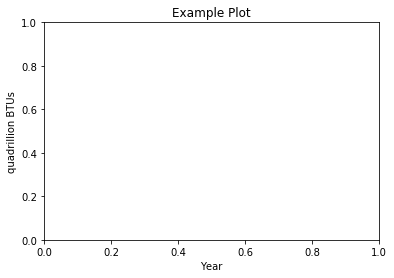

In [2]:
#Selects 3 data sets for a scatter plots
#Select data by column numbers and color by year
columnA = 1    #Use variables to allow easily select different columns
columnB = 2
year=df['Year']
dataA=df.iloc[:, columnA]
dataB=df.iloc[:, columnB]

#Create a scatter plot with different colors & markers for each data set


#Label the axes
plt.xlabel("Year")
plt.ylabel("quadrillion BTUs")
plt.title("Example Plot")
plt.show()

Sometimes you may want to color all the point differently based on a different parameter.  Next use dataA and dataB for the x and y values and color them by year. You will want to select a colormap for coloring the points - https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

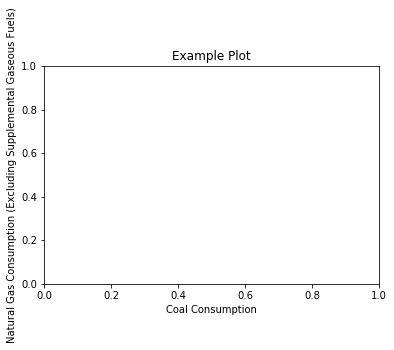

In [3]:
#Color the points based on the the using a colormap 


#Axes Labels 
plt.xlabel(df.columns.values[columnA])
plt.ylabel(df.columns.values[columnB])
plt.title("Example Plot")
plt.show()

Adding a colorbar is useful to show what the colors represent. matplotlib uses subplots to generate a handle to the figure and axes.  We will learn how to plot data on two or more axes in a figure.  

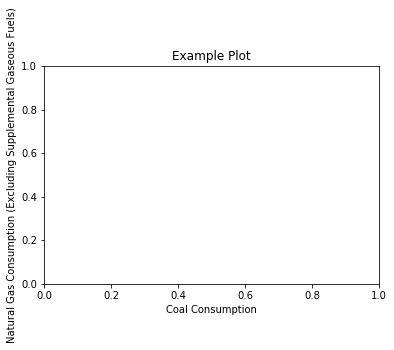

In [4]:
#Need to create a subplot to add a colorbar. 
#For the default case, subplots creates a figure with one axes
fig, ax = plt.subplots()

#need to store the image for the 
#im = ax.scatter(dataA,dataB,c=year,marker="o",cmap=plt.cm.jet)
#cb = fig.colorbar(im, ax=ax)
#cb.set_label('Year')

plt.xlabel(df.columns.values[columnA])
plt.ylabel(df.columns.values[columnB])
plt.title("Example Plot")
plt.show()

### Line graphs

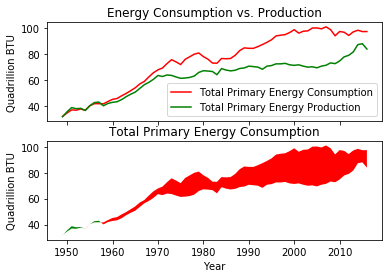

In [5]:
#create a pandas data frame 
dfc = pandas.read_csv("data/consumption.csv")
dfp = pandas.read_csv("data/production.csv")

#Select data by column number, try different columns 1 - 6
column = 6
t=dfp['Year']
cdata=dfc.iloc[:, column]
pdata=dfp.iloc[:, column]

#Need to create a subplot with two stacked plots with same x axis scale
#Note label is set for the legend in the plot function call
#%matplotlib notebook
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True)
ax1.plot(t,cdata,c='r', label = dfc.columns.values[column])
ax1.plot(t,pdata,c='g', label = dfp.columns.values[column])
ax1.legend()
ax1.set_title("Energy Consumption vs. Production")
ax1.set_ylabel("Quadrillion BTU")

#If energy production exceeds consumption, use green, else use red fill 
ax2.fill_between(t, cdata, pdata, where= pdata >= cdata, facecolor='green', interpolate=True)
ax2.fill_between(t, cdata, pdata, where= pdata < cdata, facecolor='red', interpolate=True)
ax2.set_title(dfc.columns.values[column])
ax2.set_ylabel("Quadrillion BTU")

plt.xlabel('Year')
plt.show()
